In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
df= sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 2. Exploratory Data Analysis (EDA)

In [34]:
print("\n2. Performing Exploratory Data Analysis (EDA)...")
print("\n--- Dataset Information ---")
print(df.info())


2. Performing Exploratory Data Analysis (EDA)...

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [36]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



--- Survival Distribution ---
survived
0    549
1    342
Name: count, dtype: int64


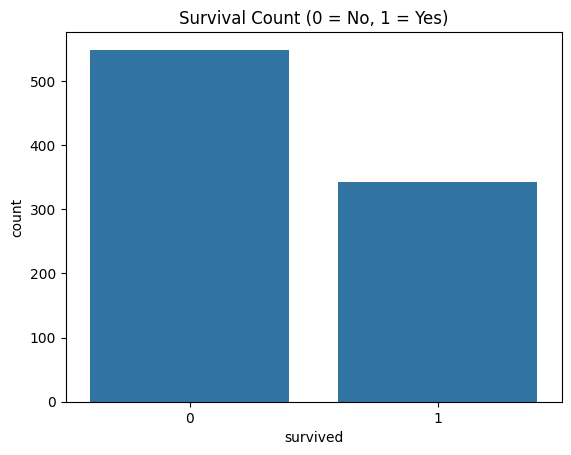

In [37]:
print("\n--- Survival Distribution ---")
print(df['survived'].value_counts())
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()


--- Survival by Gender ---


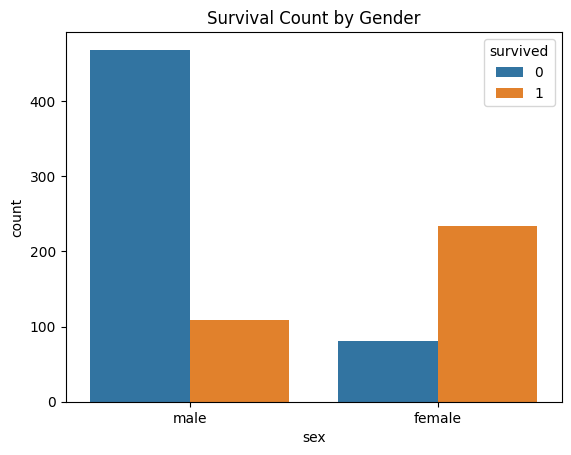

In [38]:
print("\n--- Survival by Gender ---")
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

# 3. Data Cleaning and Preprocessing

In [43]:
# 2. Data Cleaning and Preprocessing
print("\n2. Data Cleaning and Preprocessing...")

# Drop columns that are not useful or have too many missing values
print("Dropping unnecessary columns: 'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'...")
df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1, inplace=True)

# Handle missing values
print("Handling missing values...")
# Fill missing 'age' values with the median
df['age'].fillna(df['age'].median(), inplace=True)
# Fill missing 'embarked' values with the mode (most frequent value)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


2. Data Cleaning and Preprocessing...
Dropping unnecessary columns: 'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'...
Handling missing values...

Missing values after cleaning:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_16108\2022297232.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\AIMS TECH\AppData\Local\Temp\ipykernel_16108\2022297232.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

# 4. Feature Engineering and Encoding

In [44]:
# 3. Feature Engineering and Encoding
print("\n3. Feature Engineering and Encoding...")

# Convert categorical features into numerical using Label Encoding
print("Converting 'sex' and 'embarked' to numerical features...")
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

le_embarked = LabelEncoder()
df['embarked'] = le_embarked.fit_transform(df['embarked'])

print("\nDataset after all preprocessing and encoding:")
print(df.head())
print("\nFinal data types:")
print(df.dtypes)


3. Feature Engineering and Encoding...
Converting 'sex' and 'embarked' to numerical features...

Dataset after all preprocessing and encoding:
   survived  pclass  sex   age  sibsp  parch     fare  embarked
0         0       2    1  22.0      1      0   7.2500         2
1         1       0    0  38.0      1      0  71.2833         0
2         1       2    0  26.0      0      0   7.9250         2
3         1       0    0  35.0      1      0  53.1000         2
4         0       2    1  35.0      0      0   8.0500         2

Final data types:
survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object


# 5. Splitting the Data

In [45]:
# 4. Splitting the data into training and testing sets
print("\n4. Splitting the data...")
X = df.drop('survived', axis=1) # Features
y = df['survived'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


4. Splitting the data...
Training set size: 712 samples
Testing set size: 179 samples


# 6. Model Training: Logistic Regression

In [46]:
# 5. Model Training: Logistic Regression
print("\n5. Training the Logistic Regression model...")
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


5. Training the Logistic Regression model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# 6. Model Evaluation


6. Evaluating the model...

Model Accuracy: 0.81

--- Confusion Matrix ---


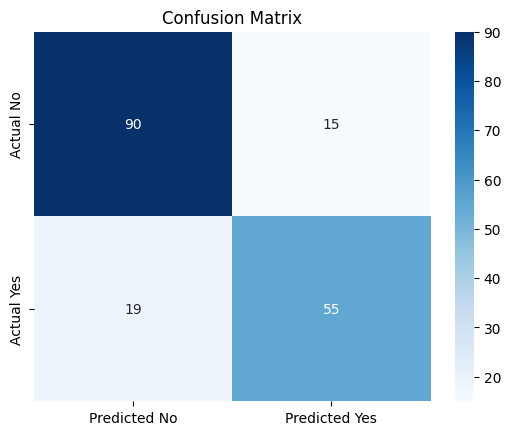


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [47]:
print("\n6. Evaluating the model...")
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Print Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))



# print("\n🎉 The process is complete!")